# 17. Visualization of Filters

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Subset, random_split

import torchvision.utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 15.1 Prepare Data

In [3]:
# 사이즈가 각각 모두 다르므로 통일해주어야함.
transform = transforms.Compose([
    transforms.Resize((96, 96)),
    transforms.ToTensor()
])

data = dsets.ImageFolder('data/dogcat/', transform)

In [4]:
def imshow(img, title):
    img = torchvision.utils.make_grid(img, normalize=True)
    npimg = img.numpy()
    fig = plt.figure(figsize = (5, 15))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.axis('off')
    plt.show()

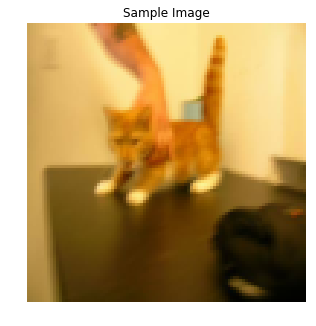

In [5]:
sample_image = data[0][0].view(1, 3, 96, 96)
imshow(sample_image, "Sample Image")

## 15.2 Load Model

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv_layer = nn.Sequential(
            nn.Conv2d(3, 32, 5), # 32 * 92 * 92
            nn.ReLU(),
            nn.MaxPool2d(2,2), # 32 * 46 * 46
            nn.Conv2d(32, 64, 5), # 64 * 42 * 42
            nn.ReLU(),
            nn.MaxPool2d(2,2), # 64 * 21 * 21
            nn.Conv2d(64, 128, 4), # 128 * 18 * 18
            nn.ReLU(),
            nn.MaxPool2d(2,2) # 128 * 9 * 9
        )

        self.fc_layer = nn.Sequential(
            nn.Linear(128*9*9, 100),
            nn.ReLU(),
            nn.Linear(100, 2)              
        )
        
    def forward(self, x):
        out = self.conv_layer(x)
        out = out.view(-1, 128*9*9)
        out = self.fc_layer(out)
        
        return out

In [7]:
model = torch.load("sample3.pth")

In [8]:
model.conv_layer

Sequential(
  (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(64, 128, kernel_size=(4, 4), stride=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

## 15.3 Visualization

First Layer Info : torch.Size([1, 32, 92, 92])


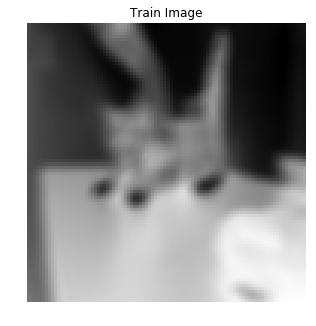

In [9]:
first_layer_image = model.conv_layer[0](sample_image.cuda())
print("First Layer Info :", first_layer_image.shape)
imshow(first_layer_image[:,0,:,:].cpu().detach(), "Train Image")

Second Layer Info : torch.Size([1, 64, 42, 42])


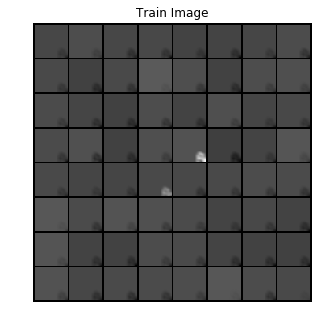

In [10]:
second_layer_image = model.conv_layer[0:4](sample_image.cuda())
print("Second Layer Info :", second_layer_image.shape)
imshow(second_layer_image.view(-1, 1, 42, 42).cpu().detach(), "Train Image")